# The GEE_ISMN Package

## Table of Contents
1. Install & Import modules
2. Setup
3. Preprocessing
4. Google Earth Engine (GEE)
5. Postprocessing
6. Visualization

## 1. Install & Import modules

Two needed packages must be installed first. This is done via pip install.

In [ ]:
import sys
!{sys.executable} -m pip install ismn
!{sys.executable} -m pip install geehydro

The Google Earth Engine (GEE) API will be installed via conda which is a Python package and enviroment manager.

In [ ]:
conda install -c conda-forge earthengine-api

Now the different modules of the GEE_ISMN package are imported.

In [1]:
from GEE_ISMN import setup_pkg as pkg
from GEE_ISMN import preprocess as prep
from GEE_ISMN import earthengine as earth
from GEE_ISMN import postprocess as post
from GEE_ISMN import visualization as vis

## 2. Setup
Before the start, a few things need to be set up. The ISMN datasets which should be analysed needs to be in a subdirectory of the working directory called ./data/ISMN. 
The function setup_pkg() checks if the directory exists and creats a new directory called ISMN_Filt in the data directory where the filltered ISMN files will be stored.
Also it will initialize the Google Earth Engine (GEE) API and checks if the credentials are existing. If not, the function will ask to authenticate.
At last you will be ask if you want to extract backscatter values for the point coordinates of each station (Option 0) or if you want calculated mean backscatter values for a bounding box of each location (Option 1).

In [2]:
user_input = pkg.setup_pkg()

Directory  ./data/ISMN_Filt/  already exists.
Do you want to extract... 
 backscatter values for the pixel coordinate (input: 0) 
 or the mean backscatter value for a box surrounding the pixel coordinate (input: 1)?0


## Preprocessing
In the preprocessing, the data is checked if it contains soil moisture measurements and will be filtered for a specific measurement depth which can be set as a parameter in the data_handling() function. Standardized the measurment depth will be 0.05 m. 

In [3]:
prep.data_handling(measurement_depth=0.05)

226 ISMN files were found in './data/ISMN/'. 
66 ISMN files with a measurement depth of 0.05 were copied to './data/ISMN_Filt/'


The filtered data can than be saved to a dictionary with the function data.import(). It will write an entry for every station and sensor used. 
Also the function creates an CSV-File "stations.csv" which contains the coordinates and the name of each entry. 

In [4]:
data_dict = prep.data_import()

## 4. Google Earth Engine
The filtered data will than be filtered again, this time by landcover type. Therefore the data_dict contains the data and the input_dict the user inputs from the setup. The landcover types can be set through the parameter landcover_ids. Standardized are the values 40 (clutivated and managed vegetation / agriculture) and 60 (Bare / sparse vegetation). <br>
The landcover ids for the different landcovers can be retrieved [here](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_Landcover_100m_Proba-V_Global).

In [5]:
data_dict = earth.lc_filter(data_dict, user_input, landcover_ids=None)

26 out of 66 locations remain after applying the land cover filter.


Now we got only the locations we are interested in. The next step is now to retrieve the backscatter values for these locations. 

In [6]:
data_dict = earth.get_s1_backscatter(data_dict)

SCAN-Mt_Vernon-Hydraprobe-Analog-(2.5-Volt): Image collection of the descending track is empty.
 No backscatter data was extracted.
SCAN-Rogers_Farm_#1-Hydraprobe-Analog-(2.5-Volt): Image collection of the descending track is empty.
 No backscatter data was extracted.


## 5. Postprocessing

Because there are just limited recordings of Sentinel-1 data and much more soil moisture data, just the soil moisture value immediatley before the Sentinel-1 recording will be kept. As the result, two dataframes will be created, one for the descending orbit and one for the ascending orbit. These dataframes contain the Sentinel-1 timestamp and the associated backscatter values which are now assigned a soil moisture value and the associated time of measurement.

In [7]:
data_dict = post.ts_filter(data_dict)

## 6. Visualization

For visualization, we need the station names which were created in preprocessing and saved to the CSV-File "stations.csv". The name is a combination of the Network, the station and the sensor. In this case the station Guarrati from the network REMEDHUS and the sensor Stevens-Hydra-Probe is chosen.

In [8]:
station_name = 'REMEDHUS-Guarrati-Stevens-Hydra-Probe'

With the function plot_data() it is possible to plot the specific data of a station with the needed orbit or polarization. It will show a Graph in which the ISMN soil moisture data is plotted against the Sentinel-1 backscatter values over time. <br>
The standard for the orbit will be "desc" for descending, but can also be choosen as "asc" for ascending.<br>
For the polarisation the options are "VH" and "VV".

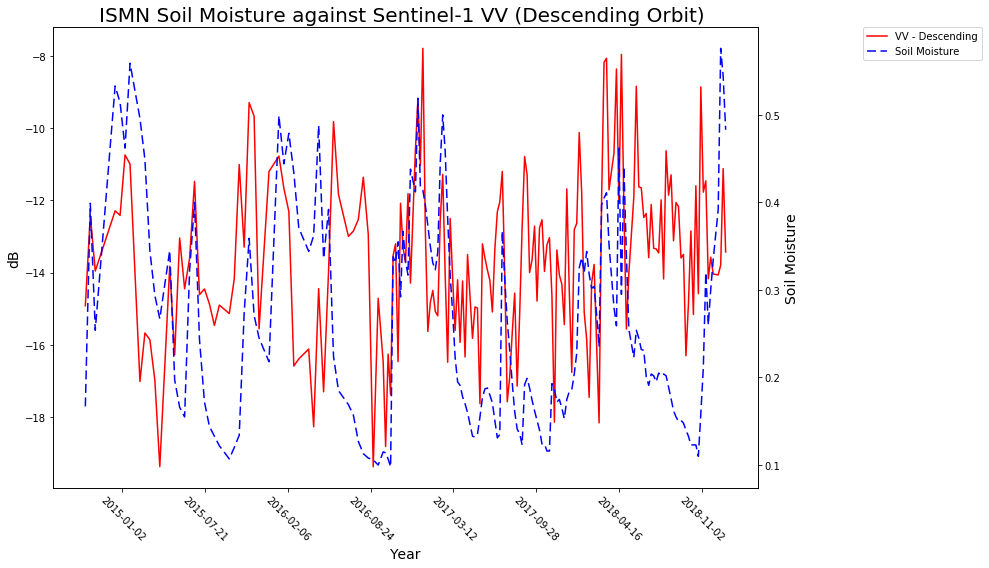

In [9]:
vis.plot_data(data_dict, station_name, orbit=None, pol=None)

Also it is possible to generate two maps. The function show_map() displays the chosen station on a map with an optical satellite imagery as a basemap. <br>
The other map is generated by the function show_s1() which displays a Sentinel-1 scene that covers the location of the chosen station.

In [ ]:
vis.show_map(data_dict, station_name)
img = vis.show_s1(data_dict, station_name, date)